In [ ]:
pip install yfinance matplotlib PyPortfolioOpt numpy pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


[*********************100%***********************]  5 of 5 completed


Expected annual return: 28.3%
Annual volatility: 32.6%
Sharpe Ratio: 0.81
Expected annual return: 17.5%
Annual volatility: 29.1%
Sharpe Ratio: 0.53


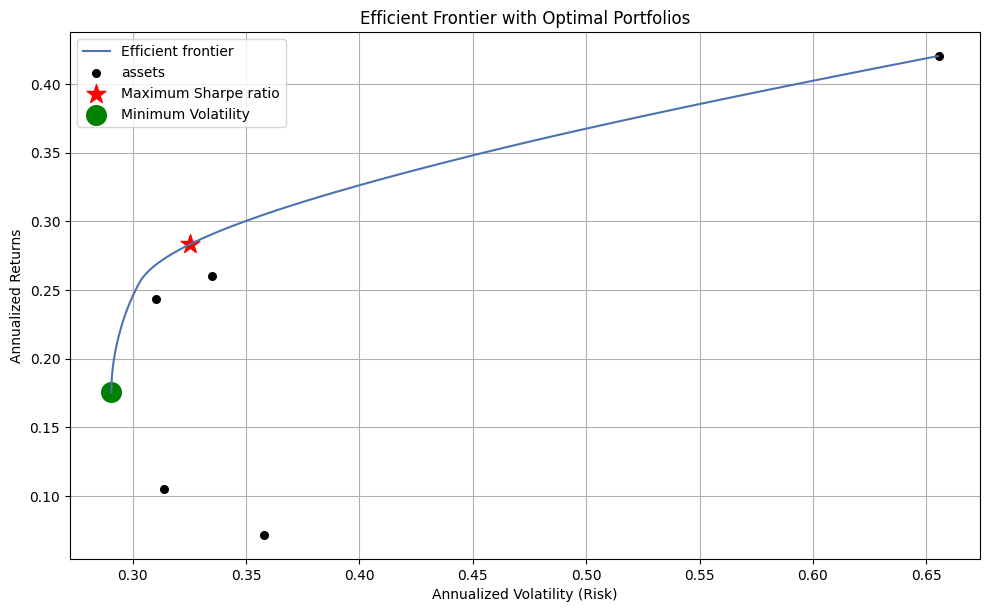

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

# Define the stock tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download the historical stock data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# First, calculate the Maximum Sharpe Ratio portfolio
ef_sharpe = EfficientFrontier(mu, S)
max_sharpe_portfolio = ef_sharpe.max_sharpe()  # Maximize the Sharpe ratio
max_sharpe_weights = ef_sharpe.clean_weights()
max_sharpe_return, max_sharpe_volatility, _ = ef_sharpe.portfolio_performance(verbose=True)

# Now, create a new EfficientFrontier object for Minimum Volatility
ef_volatility = EfficientFrontier(mu, S)
min_volatility_portfolio = ef_volatility.min_volatility()  # Minimize volatility
min_volatility_weights = ef_volatility.clean_weights()
min_vol_return, min_vol_volatility, _ = ef_volatility.portfolio_performance(verbose=True)

# Create a separate Efficient Frontier object just for plotting
ef_plot = EfficientFrontier(mu, S)  # No optimization here, just for visualization

# Plotting the Efficient Frontier
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the efficient frontier using the fresh object
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# Plot the Maximum Sharpe ratio point
ax.scatter(max_sharpe_volatility, max_sharpe_return, marker="*", s=200, c="r", label="Maximum Sharpe ratio")

# Plot the Minimum Volatility point
ax.scatter(min_vol_volatility, min_vol_return, marker="o", s=200, c="g", label="Minimum Volatility")

# Customizing the plot
plt.title('Efficient Frontier with Optimal Portfolios')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Returns')
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  5 of 5 completed


Expected annual return: 28.3%
Annual volatility: 32.6%
Sharpe Ratio: 0.81
Expected annual return: 17.5%
Annual volatility: 29.1%
Sharpe Ratio: 0.53


<ipython-input-4-fb091341ba1c>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (np.sqrt(S.iloc[i, i]), mu[i]), fontsize=12, ha='right')


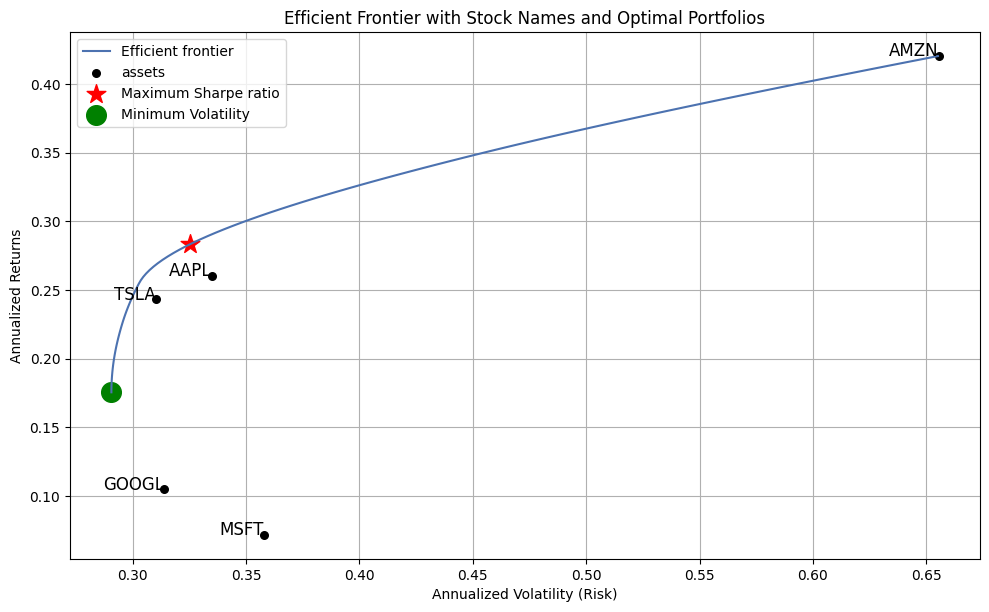

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

# Define the stock tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download the historical stock data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# First, calculate the Maximum Sharpe Ratio portfolio
ef_sharpe = EfficientFrontier(mu, S)
max_sharpe_portfolio = ef_sharpe.max_sharpe()  # Maximize the Sharpe ratio
max_sharpe_weights = ef_sharpe.clean_weights()
max_sharpe_return, max_sharpe_volatility, _ = ef_sharpe.portfolio_performance(verbose=True)

# Now, create a new EfficientFrontier object for Minimum Volatility
ef_volatility = EfficientFrontier(mu, S)
min_volatility_portfolio = ef_volatility.min_volatility()  # Minimize volatility
min_volatility_weights = ef_volatility.clean_weights()
min_vol_return, min_vol_volatility, _ = ef_volatility.portfolio_performance(verbose=True)

# Create a separate Efficient Frontier object just for plotting
ef_plot = EfficientFrontier(mu, S)  # No optimization here, just for visualization

# Plotting the Efficient Frontier
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the efficient frontier using the fresh object
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# Plot the Maximum Sharpe ratio point
ax.scatter(max_sharpe_volatility, max_sharpe_return, marker="*", s=200, c="r", label="Maximum Sharpe ratio")

# Plot the Minimum Volatility point
ax.scatter(min_vol_volatility, min_vol_return, marker="o", s=200, c="g", label="Minimum Volatility")

# Annotate each asset with its ticker name
for i, txt in enumerate(tickers):
    ax.annotate(txt, (np.sqrt(S.iloc[i, i]), mu[i]), fontsize=12, ha='right')

# Customizing the plot
plt.title('Efficient Frontier with Stock Names and Optimal Portfolios')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Returns')
plt.legend()
plt.grid()
plt.show()
